<h1>Варіант 2</h1>
<p>3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18,19 20, 22, 23, 24, 27</p>

In [9]:
import string
import random
import pandas as pd
import numpy as np
df = pd.read_csv('D:/condaEnvs/NationalNames.csv')

<h2>Вправа 3</h2>
<p>Отримайте імена стовпців набору даних.</p>

In [12]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

<h2>Вправа 4</h2>
<p>Отримайте загальну інформацію про дані у наборі даних.</p>

In [14]:
columns_included = ['Id', 'Year', 'Count']
summary = df[columns_included].describe(percentiles=[.25, .5, .75])
summary

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


<h2>Вправа 5</h2>
<p>Знайдіть кількість унікальних імен у наборі даних.</p>

In [13]:
df['Name'].nunique()

93889

<h2>Вправа 8</h2>
<p>Знайдіть найпопулярніше ім'я за результатами одного року (ім'я, для якого Count максимальне)</p>

In [15]:
year = 1947
fq_name = df[df['Year'] == year];
most = pd.DataFrame([fq_name.loc[fq_name['Count'].idxmax()]])
most

,Id,Name,Year,Gender,Count
431052,431053,Linda,1947,F,99680


<h2>Вправа 9</h2>
<p>Підрахуйте кількість записів, для яких Count-мінімальне у наборі.</p>

In [5]:
minimal = df.loc[df['Count'].idxmin()]
rows = df[df['Count'] == minimal['Count']]
rows.shape[0]

<h2>Вправа 11</h2>
<p>Знайдіть рік із найбільшою кількістю унікальних імен.</p>

In [14]:
df.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1)

Year
2008    32488
Name: Name, dtype: int64

<h2>Вправа 12</h2>
<p>Знайдіть найпопулярніше ім'я в році з найбільшою кількістю унікальних імен(тобто у 2008 році)</p>

In [15]:
year_max_unique = df.groupby('Year')['Name'].nunique().idxmax()
df[df['Year'] == year_max_unique].sort_values('Count', ascending=False).iloc[0]['Name']

'Jacob'

<h2>Вправа 13</h2>
<p>Знайдіть рік, коли ім'я "Jacob" було найпопулярнішим серед жіночих імен</p>

In [16]:
female_df = df[df['Gender'] == 'F']
jacob_df = female_df[female_df['Name'] == 'Jacob']
jacob_df.sort_values('Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


<h2>Вправа 14</h2>
<p>Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)</p>

In [17]:
male_names = df[df['Gender'] == 'M'].groupby(['Year', 'Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Year', 'Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
male_names = male_names.loc[gender_neutral_names]
gender_neutral_counts = male_names.groupby(level=0).count()
gender_neutral_counts.sort_values(ascending=False).head(1)

Year
2008    2557
Name: Count, dtype: int64

<h2>Вправа 16</h2>
<p>Знайдіть рік, коли народилося найбільше дітей</p>

In [18]:
df.groupby('Year')['Count'].sum().idxmax()

1957

<h2>Вправа 17</h2>
<p>Знайдіть кількість дівчаток та хлопчиків, які народились кожного
року</p>

In [19]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


<h2>Вправа 18</h2>
<p>Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.</p>

In [20]:
boys_girls_count = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
boys_girls_count[boys_girls_count['F'] > boys_girls_count['M']].shape[0]

54

<h2>Вправа 19</h2>
<p>Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.</p>

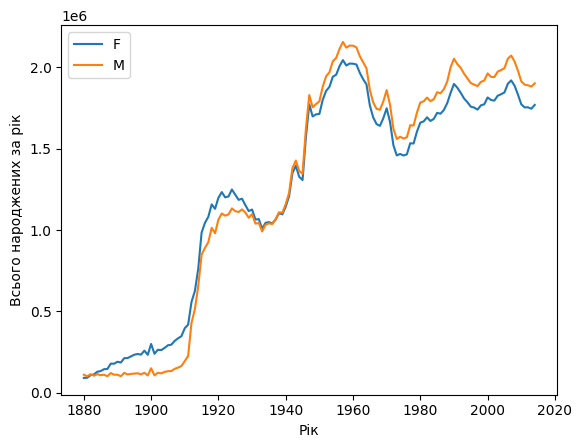

In [10]:
from matplotlib import pyplot as plt 
%matplotlib inline
gc = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
plt.plot(gc.index, gc['F'], label='F')
plt.plot(gc.index, gc['M'], label='M')
plt.xlabel('Рік')
plt.ylabel('Всього народжених за рік')
legend = plt.legend(loc='upper left', frameon=True)

<h2>Вправа 20</h2>
<p>Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)</p>

In [17]:
male_names = df[df.Gender == 'M']['Name']
female_names = df[df.Gender == 'F']['Name']
len(np.intersect1d(male_names.values,female_names.values))

10221

<h2>Вправа 22</h2>
<p>Підрахуйте скільки років проводилось спостереження</p>

In [21]:
num_of_years = len(df['Year'].unique())
print(f"Спостереження проводились {num_of_years} років.")

Спостереження проводились 135 років.


<h2>Вправа 23</h2>
<p>Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)</p>

In [22]:
num_of_years = len(df['Year'].unique())
male_names = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
female_names = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum()
gender_neutral_names = male_names.index.intersection(female_names.index)
popular_gender_neutral_names = df[df['Name'].isin(gender_neutral_names)].groupby('Name').filter(lambda x: x['Year'].nunique() == num_of_years)['Name'].unique()
pd.DataFrame(data=popular_gender_neutral_names)

,0
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie
...,...
818,Noble
819,Rupert
820,Thad
821,Kelly


<h2>Вправа 24</h2>
<p>Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )</p>

In [27]:
years_threshold = 50
unpopular_names = df.groupby('Name').filter(lambda x: x['Year'].nunique() < years_threshold).groupby('Name')['Count'].sum()
unpopular_name = unpopular_names.sort_values(ascending=False).head(1)
f"Найпопулярніше ім'я серед непопулярних (названих менш ніж за {years_threshold} років) - {unpopular_name.index[0]}, {unpopular_name.values[0]} разів."

"Найпопулярніше ім'я серед непопулярних (названих менш ніж за 50 років) - Jayden, 189220 разів."

<h2>Вправа 27</h2>
<p>Знайти найпопулярніші імена в кожному році.</p>

In [26]:
byYear = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()
most_popular = byYear.loc[byYear.groupby('Year')['Count'].idxmax()]
most_popular

,Year,Name,Count
955,1880,John,9701
2818,1881,John,8795
4735,1882,John,9597
6727,1883,John,8934
8775,1884,John,9428
...,...,...,...
1521288,2010,Isabella,22913
1568092,2011,Sophia,21839
1599369,2012,Sophia,22285
1630271,2013,Sophia,21172
